In [2]:
import pandas as pd
import toolbox_ML as tools_ML
import numpy as np
import seaborn as sns
import scipy.stats as stats #Quitar
from scipy.stats import chi2_contingency #Quitar

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_practica_rl = pd.read_csv("./data/practica_regresion_lineal.csv", sep="|")

# ROGELIO

# Función tipifica_variables

In [4]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
tools_ML.tipifica_variables(df=df_titanic, umbral_categoria=10, umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,survived,int64,2,0.22,Binaria
1,pclass,int64,3,0.34,Categórica
2,sex,object,2,0.22,Binaria
3,age,float64,88,9.88,Numérica continua
4,sibsp,int64,7,0.79,Categórica
5,parch,int64,7,0.79,Categórica
6,fare,float64,248,27.83,Numérica continua
7,embarked,object,3,0.34,Categórica
8,class,object,3,0.34,Categórica
9,who,object,3,0.34,Categórica


# Función plot_features_num_regression

In [7]:
df_practica_rl.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
df_practica_rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


['NOX', 'RM']


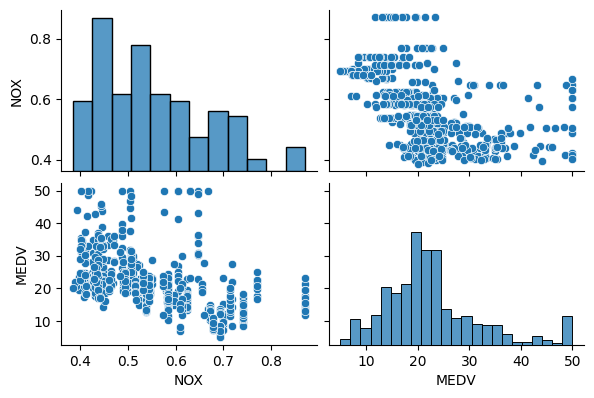

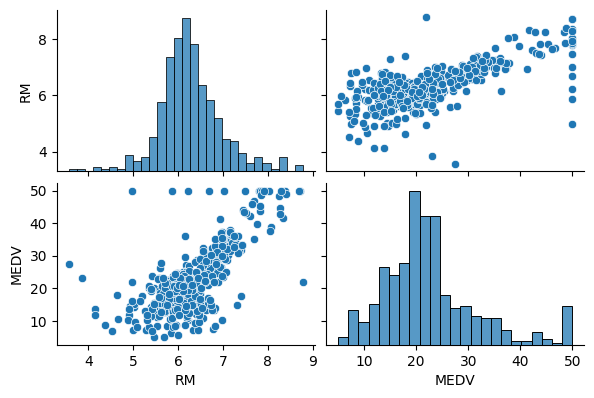

In [9]:
features_numericas = tools_ML.plot_features_num_regression(df=df_practica_rl, target_col="MEDV", lista_columnas=["NOX","CHAS","RM"], umbral_corr=0.4, umbral_pvalue=0.05, limite_pairplot=2)
print(features_numericas)

# Función get_features_cat_regression

In [10]:
df_titanic_limpio = df_titanic.drop(columns=["age", "embarked", "embark_town", "deck"])
df_titanic_limpio.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [11]:
df_titanic_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   class       891 non-null    object 
 7   who         891 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alive       891 non-null    object 
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 64.5+ KB


In [12]:
features_categoricas = tools_ML.get_features_cat_regression(df=df_titanic_limpio, target_col="fare", umbral_pvalue=0.05)
print(features_categoricas)

['sex', 'class', 'who', 'alive']


# ESTELA

# Función get_features_num_regression

In [13]:
features_numericas = tools_ML.get_features_num_regression(df=df_titanic, target_col="age", umbral_corr=0.1, pvalue=None)
print(features_numericas)

['pclass', 'age', 'sibsp', 'parch', 'adult_male', 'alone']


In [14]:
df_titanic['age'] = pd.to_numeric(df_titanic['age'], errors='coerce') #error=coerce convierte los valores no numericos a nan


Función 3: 


In [30]:
tools_ML.describir_df(df_titanic)

,Tipos,% Faltante,Valores Únicos,% Cardinalidad
survived,int64,0.00,2,0.22
pclass,int64,0.00,3,0.34
sex,object,0.00,2,0.22
age,float64,19.87,88,9.88
sibsp,int64,0.00,7,0.79
parch,int64,0.00,7,0.79
fare,float64,0.00,248,27.83
embarked,object,0.22,3,0.34
class,object,0.00,3,0.34
who,object,0.00,3,0.34


# Numa

['NOX', 'RM']

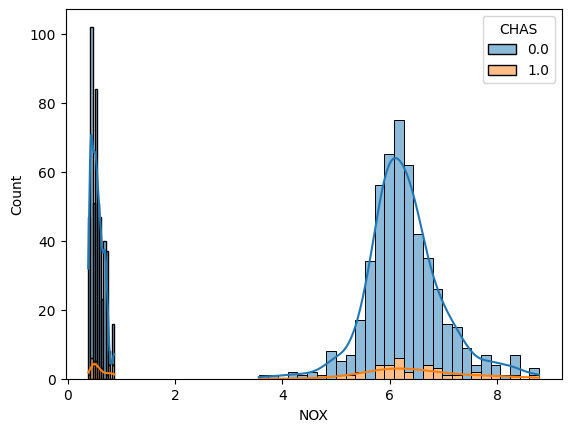

In [ ]:
def plot_features_cat_regression(dataframe, target_col="", columns=[], pvalue=0.05, with_individual_plot=True):

    # Verificar los valores de entrada
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("El primer argumento debe ser un dataframe.")
    
    if target_col not in dataframe.columns:
        raise ValueError(f"La columna '{target_col}' no existe en el dataframe.")
    
    if not isinstance(columns, list):
        raise ValueError("El argumento 'columns' debe ser una lista.")
    
    if not all(col in dataframe.columns for col in columns):
        raise ValueError("Al menos una de las columnas especificadas en 'columns' no existe en el dataframe.")
    
    if not isinstance(pvalue, (float, int)):
        raise ValueError("El argumento 'pvalue' debe ser un número.")
    
    if not isinstance(with_individual_plot, bool):
        raise ValueError("El argumento 'with_individual_plot' debe ser un valor booleano.")
    
    # Si la lista 'columns' está vacía, asignar las variables numéricas del dataframe
    if not columns:
        columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    
    # Almacenar las columnas que cumplen las condiciones
    significant_columns = []
    
    for col in columns:
        # Realizar el test de chi-cuadrado entre la variable categórica y la target
        contingency_table = pd.crosstab(dataframe[col], dataframe[target_col])
        _, p_val, _, _ = chi2_contingency(contingency_table)
        
        # Comprobar si el p-valor es significativo
        if p_val <= (1 - pvalue):
            significant_columns.append(col)
            
            # Si se especifica, plotear el histograma agrupado
    
        if with_individual_plot:
            sns.histplot(data=dataframe, x=col, hue=target_col, multiple="stack", kde=True)
                
    return significant_columns


plot_features_cat_regression(df_practica_rl, target_col = "CHAS", columns = ["NOX","RM"])